In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../kaggle_prediction_library/') 
import preprocess
import feature_engineering
import submission
import validation
from sklearn.model_selection import train_test_split

# from hyperopt import tpe, fmin, Trials
# import hyperopt.hp as hp

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import brier_score_loss
from sklearn.pipeline import make_pipeline



### Read in Data

In [159]:
to_predict_mens = pd.read_csv("to_predict_mens.csv")

In [157]:
ncaaw_odds = pd.read_csv("../data/ncaaw_first_round_odds.csv")

In [160]:
to_predict_womens = pd.read_csv("to_predict_women.csv")


In [162]:
to_predict_womens = to_predict_womens.merge(ncaaw_odds, how="left", on="ID")

In [138]:
# to_predict_womens = to_predict_womens[ (to_predict_womens.Season == 2023)
                 
#                   & 
#                  ( 
#                  ((to_predict_womens.t1_Seed == 1) & (to_predict_womens.t2_Seed == 16))
#                  | ((to_predict_womens.t1_Seed == 2) & (to_predict_womens.t2_Seed == 15))
#                  | ((to_predict_womens.t1_Seed == 3) & (to_predict_womens.t2_Seed == 14))
#                  | ((to_predict_womens.t1_Seed == 4) & (to_predict_womens.t2_Seed == 13))
#                  | ((to_predict_womens.t1_Seed == 5) & (to_predict_womens.t2_Seed == 12))
#                  | ((to_predict_womens.t1_Seed == 6) & (to_predict_womens.t2_Seed == 11))
#                  | ((to_predict_womens.t1_Seed == 7) & (to_predict_womens.t2_Seed == 10))
#                  | ((to_predict_womens.t1_Seed == 8) & (to_predict_womens.t2_Seed == 9))
#                  | ((to_predict_womens.t1_Seed == 9) & (to_predict_womens.t2_Seed == 8))
#                  | ((to_predict_womens.t1_Seed == 10) & (to_predict_womens.t2_Seed == 7))
#                  | ((to_predict_womens.t1_Seed == 11) & (to_predict_womens.t2_Seed == 6))
#                  | ((to_predict_womens.t1_Seed == 12) & (to_predict_womens.t2_Seed == 5))
#                  | ((to_predict_womens.t1_Seed == 13) & (to_predict_womens.t2_Seed == 4))
#                  | ((to_predict_womens.t1_Seed == 14) & (to_predict_womens.t2_Seed == 3))
#                  | ((to_predict_womens.t1_Seed == 15) & (to_predict_womens.t2_Seed == 2))
#                  | ((to_predict_womens.t1_Seed == 16) & (to_predict_womens.t2_Seed == 1))
#                  )
                  
#                   ]

### Womens Only

In [3]:
def feature_set_evaluator(feature_sets, df, model, param_grid):
   
    eval_dfs = []

    for i, f in tqdm.tqdm(enumerate(feature_sets)):
        eval_df = validation.run_evaluation_framework(df, model, f, param_grid, cv_start=2015)
        eval_df["feature_set"] = [f]
        eval_dfs.append(eval_df)

    all_scores = pd.concat(eval_dfs, axis=0)
    
    return all_scores

In [4]:
f1 = ['t1_Seed', 't2_Seed', 'seed_diff',
       't1_adj_oe', 't1_adj_de', 't1_adj_margin', 't2_adj_oe', 't2_adj_de',
       't2_adj_margin']

f2 = ['seed_diff',
       't1_adj_oe', 't1_adj_de', 't1_adj_margin', 't2_adj_oe', 't2_adj_de',
       't2_adj_margin']

f3 = ['seed_diff',
       't1_adj_margin',
       't2_adj_margin']

f4 = ['seed_diff', 't1_adj_oe', 't1_adj_de', 't2_adj_oe', 't2_adj_de',]

f5 =  ['t1_adj_margin',
       't2_adj_margin']

f6 =  ['seed_diff']


In [5]:
to_predict_womens = to_predict_womens[to_predict_womens.type != "Prediction"].copy()

In [8]:
# Define the classifier and parameter grid
model = LogisticRegression()
param_grid = {
    'logisticregression__C': [.005, 0.001, .05, 0.01, 0.1],
}
pipeline = make_pipeline(StandardScaler(), model)

# eval_df = validation.run_evaluation_framework(to_predict_womens, pipeline, f4, param_grid)

import tqdm
all_scores_df = feature_set_evaluator([f1, f2, f3, f4, f5, f6
                                       ], to_predict_womens, pipeline, param_grid)


6it [01:04, 10.79s/it]


In [9]:
pd.set_option('display.max_colwidth', None)
all_scores_df["rolling_season_cv_rank"] = all_scores_df["rolling_season_cv"].rank()
all_scores_df["mean_repeated_cv_score_rank"] = all_scores_df["mean_repeated_cv_score"].rank(ascending=False)
all_scores_df.sort_values(by="mean_repeated_cv_score", ascending=False)


,best_params,mean_repeated_cv_score,repeated_cv_confidence_interval,rolling_season_cv,feature_set,rolling_season_cv_rank,mean_repeated_cv_score_rank
0,{'logisticregression__C': 0.1},-0.140616,"(-0.14249565822956378, -0.13873729882136898)",0.141984,"[seed_diff, t1_adj_margin, t2_adj_margin]",4.0,1.0
0,{'logisticregression__C': 0.05},-0.140723,"(-0.14261758064070462, -0.1388291849538173)",0.141743,"[seed_diff, t1_adj_oe, t1_adj_de, t2_adj_oe, t2_adj_de]",1.0,2.0
0,{'logisticregression__C': 0.05},-0.140741,"(-0.14249052718155134, -0.1389920687441105)",0.141753,"[seed_diff, t1_adj_oe, t1_adj_de, t1_adj_margin, t2_adj_oe, t2_adj_de, t2_adj_margin]",2.0,3.0
0,{'logisticregression__C': 0.05},-0.140937,"(-0.1427822345474472, -0.1390920421097826)",0.141802,"[t1_Seed, t2_Seed, seed_diff, t1_adj_oe, t1_adj_de, t1_adj_margin, t2_adj_oe, t2_adj_de, t2_adj_margin]",3.0,4.0
0,{'logisticregression__C': 0.1},-0.149243,"(-0.15115935429500302, -0.14732657757927828)",0.149736,"[t1_adj_margin, t2_adj_margin]",5.0,5.0
0,{'logisticregression__C': 0.1},-0.153285,"(-0.15498227885364144, -0.15158797068186533)",0.153750,[seed_diff],6.0,6.0


### Train With Both

Seems worse to use the men's data in the prediction

In [14]:
combined = pd.concat(
    [to_predict_womens[ ["Season", "Pred", "Team1", "Team2", "Outcome"] + f4],
    to_predict_mens[ ["Season", "Pred", "Team1", "Team2", "Outcome"] + f4],],
axis = 0)
     
combined = combined[combined.Season != 2023]

rolling_preds = validation.rolling_season_cv(pipeline, combined, f4, label='Outcome', cv_start=2015, return_preds=True)[1]


In [28]:
rolling_preds_women = rolling_preds[rolling_preds.Team1 >= 3000]

In [30]:
rolling_preds_women

brier_score_loss(rolling_preds_women.y_true, rolling_preds_women.y_prob)

0.1553347781593787

### Evaluate raddar's womens preds

In [185]:
raddar_preds = pd.read_csv("../submissions/all_raddar_preds_women.csv")

In [186]:
tourney_results = pd.read_csv("../data/WNCAATourneyDetailedResults.csv")
tourney_results = tourney_results
t1 = tourney_results[["Season", "WTeamID", "LTeamID"]].copy()
t1.columns = ["Season", "Team1", "Team2"]
t2 = tourney_results[["Season", "LTeamID", "WTeamID"]].copy() 
t2.columns = ["Season", "Team1", "Team2"]
t1["Outcome"] = 1
t2["Outcome"] = 0
ground_truth = pd.concat([t1,t2], axis=0)
ground_truth["ID"] = ground_truth.Season.astype(str) + "_" + ground_truth["Team1"].astype(str) + "_" +ground_truth["Team2"].astype(str)


In [187]:
raddar_preds[['Season', 'Team1', 'Team2']] = raddar_preds.ID.str.split('_', expand=True)


In [188]:
ground_truth = ground_truth.merge(raddar_preds.rename(columns={"Pred": "raddar_pred"})[["ID", "raddar_pred"]],
                   how = "inner", 
                   on = "ID")

In [95]:
ground_truth_before_2023 = ground_truth[ground_truth.Season != 2023].copy()

brier_score_loss(ground_truth_before_2023.Outcome, ground_truth_before_2023.raddar_pred)


0.147302810694727

In [96]:
to_predict_womens = pd.read_csv("to_predict_women.csv")
to_predict_womens = to_predict_womens[ (to_predict_womens.seed_diff.notnull())].copy()

### Compare mine and raddars

Seems like there could be very minor benefit to doing a weighted average
But it's concerning that for both mens and womens raddar does better in 2023, we do better most other years

In [97]:
def rolling_season_cv_mod(model, train_input, features, label='Outcome', cv_start=2007, return_preds=False):
    ''' returns estimate for model performance using shifted validation'''
    
    scores = []

    preds_dfs = []

    for n, season in enumerate(train_input.Season.unique()):
        
        if season >= cv_start:

            print(season)

            train = train_input[train_input.Season < season].copy()
            test = train_input[train_input.Season == season].copy()

            X_train = train[features].copy()
            X_test = test[features].copy()
            y_train = train[label].copy()
            y_test = test[label].copy()


            model.fit(X_train[features], y_train)
            
            y_prob = model.predict_proba(X_test[features])

            test["y_prob"] = y_prob[:,1].copy()
            test["y_true"] = y_test.copy()
            preds_dfs.append(test)

            if season != 2023:
                loss = brier_score_loss(y_test, y_prob[:,1])
                scores.append((season, loss))

    validation_df = pd.DataFrame(scores, columns = ['season', 'score']).sort_values(by = 'score')
    avg_validation_score = validation_df.score.mean()

    all_preds = pd.concat(preds_dfs,axis =0)

    if return_preds:
        return avg_validation_score, all_preds
    else:
        return avg_validation_score



In [98]:
rolling_preds = rolling_season_cv_mod(pipeline, to_predict_womens, f4, label='Outcome', cv_start=2015, return_preds=True)[1]


2015
2016
2017
2018
2019
2021
2022
2023


In [99]:
rolling_preds

,Unnamed: 0,type,ID,Pred,Season,Team1,Team2,Outcome,Gender,margin,...,t2_Seed,seed_diff,t1_adj_oe,t1_adj_de,t1_adj_margin,t2_adj_oe,t2_adj_de,t2_adj_margin,y_prob,y_true
315,315,Historical,2015_3116_3321,NaN,2015,3116,3321,1.0,W,2.0,...,7.0,3.0,102.130754,84.920270,17.210484,104.177541,84.358835,19.818706,0.372460,1.0
316,316,Historical,2015_3124_3322,NaN,2015,3124,3322,1.0,W,41.0,...,15.0,-13.0,120.165459,80.907362,39.258097,92.544652,102.018466,-9.473814,0.990735,1.0
317,317,Historical,2015_3143_3455,NaN,2015,3143,3455,1.0,W,12.0,...,13.0,-9.0,102.787019,82.785846,20.001173,100.927690,82.500281,18.427409,0.763653,1.0
318,318,Historical,2015_3173_3235,NaN,2015,3173,3235,1.0,W,12.0,...,10.0,-3.0,113.607327,87.673272,25.934056,109.624166,93.382795,16.241371,0.729660,1.0
319,319,Historical,2015_3177_3278,NaN,2015,3177,3278,1.0,W,7.0,...,8.0,1.0,114.415236,90.630826,23.784410,105.274247,94.443619,10.830628,0.666011,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65806,65806,Prediction,2023_3437_3450,0.5,2023,3437,3450,NaN,W,NaN,...,5.0,-1.0,113.722124,84.699900,29.022223,101.331588,85.071535,16.260054,0.704241,NaN
65808,65808,Prediction,2023_3437_3452,0.5,2023,3437,3452,NaN,W,NaN,...,10.0,-6.0,113.722124,84.699900,29.022223,95.601702,82.052837,13.548865,0.828238,NaN
65877,65877,Prediction,2023_3439_3450,0.5,2023,3439,3450,NaN,W,NaN,...,5.0,-4.0,114.751123,82.050175,32.700948,101.331588,85.071535,16.260054,0.820785,NaN
65879,65879,Prediction,2023_3439_3452,0.5,2023,3439,3452,NaN,W,NaN,...,10.0,-9.0,114.751123,82.050175,32.700948,95.601702,82.052837,13.548865,0.902673,NaN


In [100]:
ground_truth = ground_truth.merge(rolling_preds.rename(columns={"y_prob": "sky_pred"})[["ID", "sky_pred"]],
                   how = "inner", 
                   on = "ID")

In [101]:
ground_truth

,Season,Team1,Team2,Outcome,ID,raddar_pred,sky_pred
0,2015,3116,3321,1,2015_3116_3321,0.320224,0.372460
1,2015,3116,3321,1,2015_3116_3321,0.320224,0.372460
2,2015,3124,3322,1,2015_3124_3322,0.959825,0.990735
3,2015,3124,3322,1,2015_3124_3322,0.959825,0.990735
4,2015,3143,3455,1,2015_3143_3455,0.774232,0.763653
...,...,...,...,...,...,...,...
1019,2023,3268,3376,0,2023_3268_3376,0.143832,0.127413
1020,2023,3326,3439,0,2023_3326_3439,0.389374,0.339989
1021,2023,3326,3439,0,2023_3326_3439,0.389374,0.339989
1022,2023,3234,3261,0,2023_3234_3261,0.388303,0.433793


In [103]:
data = []

for season in ground_truth.Season.unique():
    tmp = ground_truth[ground_truth.Season == season].copy()
    raddar_score = brier_score_loss(tmp.Outcome, tmp.raddar_pred)
    sky_score = brier_score_loss(tmp.Outcome, tmp.sky_pred)
    data.append([season, raddar_score, sky_score])

In [105]:
pd.DataFrame(data, columns = ["Season", "raddar_score", "sky_score"])


,Season,raddar_score,sky_score
0,2015,0.117776,0.120509
1,2016,0.175280,0.163867
2,2017,0.167963,0.136142
3,2018,0.152058,0.158267
4,2019,0.121833,0.123602
5,2021,0.162670,0.147406
6,2022,0.155140,0.142546
7,2023,0.153601,0.166849


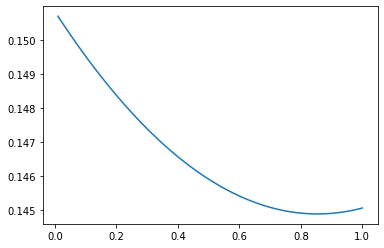

In [106]:
data = []

for i in range(1,101):    
    i = i/100
    ground_truth["blend"] = ground_truth["sky_pred"] * i + ground_truth["raddar_pred"] * (1-i) 
    loss = brier_score_loss(ground_truth.Outcome, ground_truth.blend)
    data.append([i, 1-i, loss])


tmp = pd.DataFrame(data, columns = ["percent_sky", "percent_raddar", "loss"])
tmp.sort_values(by = "percent_sky", inplace=True)

import matplotlib.pyplot as plt

plt.plot(tmp.percent_sky, tmp.loss)


In [163]:
tmp.sort_values(by="loss").head(5)

,percent_sky,percent_raddar,loss
84,0.85,0.15,0.144878
85,0.86,0.14,0.144878
83,0.84,0.16,0.144880
86,0.87,0.13,0.144880
82,0.83,0.17,0.144883


### Evaluate Odds for 2023, using mens odds model

Surprisingly doesn't seem like the odds model helps for the womens bracket

In [247]:
to_predict_mens_first_round_train = to_predict_mens[(to_predict_mens.final_odds.notnull())
                                                    & (to_predict_mens.Outcome.notnull())]

In [248]:
def train_odds_model(to_predict_mens_first_round_train):

    best_params = {"C": .1}
    model = LogisticRegression(**best_params)
    pipeline = make_pipeline(StandardScaler(), model)
    odds_model = pipeline.fit(to_predict_mens_first_round_train[["final_odds"]], to_predict_mens_first_round_train["Outcome"])
    
    return odds_model

In [249]:
odds_model = train_odds_model(to_predict_mens_first_round_train)

In [250]:
to_predict_womens_first_round = to_predict_womens[to_predict_womens.final_odds.notnull()]

In [251]:
odds_model_preds = odds_model.predict_proba(to_predict_womens_first_round[["final_odds"]])[:,1]

In [252]:
to_predict_womens_input = to_predict_womens[to_predict_womens.type != "Prediction"].copy()

In [253]:
model = LogisticRegression(C=.1)
pipeline = make_pipeline(StandardScaler(), model)


In [254]:
f3 = ['seed_diff',
       't1_adj_margin',
       't2_adj_margin']

model.fit(to_predict_womens_input[f3], to_predict_womens_input["Outcome"])

LogisticRegression(C=0.1)

In [255]:
preds_original = model.predict_proba(to_predict_womens_first_round[f3])[:,1]

In [256]:
odds_model_preds, preds_original

(array([0.45094049, 0.55888663, 0.14866079, 0.25656414, 0.39804214,
        0.80429087, 0.4432859 , 0.25656414, 0.3760083 , 0.68869442,
        0.17373981, 0.46631595, 0.45094049, 0.45094049, 0.14866079,
        0.4432859 , 0.11048827, 0.14866079, 0.82752095, 0.82305633,
        0.56650611, 0.21221466, 0.38330101, 0.39804214, 0.47402961,
        0.49723032, 0.04816491, 0.52816589, 0.73918679, 0.55123931,
        0.52816589, 0.05108491, 0.14866079]),
 array([0.46262333, 0.70006462, 0.01380969, 0.15635276, 0.61371494,
        0.98347261, 0.78629335, 0.1094088 , 0.2076602 , 0.95424697,
        0.062124  , 0.52794635, 0.66151049, 0.621564  , 0.03021276,
        0.34629603, 0.01422563, 0.02765362, 0.99453153, 0.98594878,
        0.81429103, 0.09008193, 0.34199046, 0.49235876, 0.77297139,
        0.59594961, 0.00323865, 0.8292075 , 0.9652821 , 0.87737861,
        0.66423003, 0.00612928, 0.02747296]))

In [257]:
to_predict_womens_first_round["odds_model_preds"] = odds_model_preds
to_predict_womens_first_round["preds_original"] = preds_original


/var/folders/2g/465yxy_x4g786jx2llr5xqh40000gn/T/ipykernel_20737/738248175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_womens_first_round["odds_model_preds"] = odds_model_preds
/var/folders/2g/465yxy_x4g786jx2llr5xqh40000gn/T/ipykernel_20737/738248175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_womens_first_round["preds_original"] = preds_original


In [259]:
ground_truth = ground_truth.drop_duplicates(subset=["ID", "Outcome"])
to_predict_womens_first_round = to_predict_womens_first_round.drop("Outcome", axis = 1)
to_predict_womens_first_round = to_predict_womens_first_round.merge(ground_truth[["ID", "Outcome"]], how="left", on="ID")


In [262]:
to_predict_womens_first_round = to_predict_womens_first_round[to_predict_womens_first_round.Outcome.notnull()]

In [263]:
brier_score_loss(to_predict_womens_first_round["Outcome"], to_predict_womens_first_round["odds_model_preds"])


0.13625823726214406

In [264]:
brier_score_loss(to_predict_womens_first_round["Outcome"], to_predict_womens_first_round["preds_original"])


0.1109801594242221

### Test manual override - top 4 seeds

In [266]:
to_predict_womens = pd.read_csv("to_predict_women.csv")
to_predict_womens = to_predict_womens[ (to_predict_womens.seed_diff.notnull())].copy()

In [268]:
def rolling_season_cv_mod(model, train_input, features, label='Outcome', cv_start=2007, return_preds=False):
    ''' returns estimate for model performance using shifted validation'''
    
    scores = []

    preds_dfs = []

    for n, season in enumerate(train_input.Season.unique()):
        
        if season >= cv_start:

            print(season)

            train = train_input[train_input.Season < season].copy()
            test = train_input[train_input.Season == season].copy()

            X_train = train[features].copy()
            X_test = test[features].copy()
            y_train = train[label].copy()
            y_test = test[label].copy()


            model.fit(X_train[features], y_train)
            
            y_prob = model.predict_proba(X_test[features])

            test["y_prob"] = y_prob[:,1].copy()
            test["y_true"] = y_test.copy()
            preds_dfs.append(test)

            if season != 2023:
                loss = brier_score_loss(y_test, y_prob[:,1])
                scores.append((season, loss))

    validation_df = pd.DataFrame(scores, columns = ['season', 'score']).sort_values(by = 'score')
    avg_validation_score = validation_df.score.mean()

    all_preds = pd.concat(preds_dfs,axis =0)

    if return_preds:
        return avg_validation_score, all_preds
    else:
        return avg_validation_score



In [269]:
rolling_preds = rolling_season_cv_mod(pipeline, to_predict_womens, f4, label='Outcome', cv_start=2015, return_preds=True)[1]


2015
2016
2017
2018
2019
2021
2022
2023


In [297]:
rolling_preds["y_prob_mod"] = np.where(

        ((rolling_preds.t1_Seed == 1) & (rolling_preds.t2_Seed == 16))
        | ((rolling_preds.t1_Seed == 2) & (rolling_preds.t2_Seed == 16))
        | ((rolling_preds.t1_Seed == 3) & (rolling_preds.t2_Seed == 16))
        | ((rolling_preds.t1_Seed == 4) & (rolling_preds.t2_Seed == 16))
        , 
        1,

     np.where(
          ((rolling_preds.t1_Seed == 16) & (rolling_preds.t2_Seed == 1))
        | ((rolling_preds.t1_Seed == 15) & (rolling_preds.t2_Seed == 2))
        | ((rolling_preds.t1_Seed == 14) & (rolling_preds.t2_Seed == 3))
        | ((rolling_preds.t1_Seed == 13) & (rolling_preds.t2_Seed == 4))
        , 
        
        0,

          
          
          
          rolling_preds.y_prob
))

/var/folders/2g/465yxy_x4g786jx2llr5xqh40000gn/T/ipykernel_20737/4289194600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_preds["y_prob_mod"] = np.where(


In [298]:
ground_truth = ground_truth.drop_duplicates(subset=["ID", "Outcome"])
rolling_preds = rolling_preds.drop("Outcome", axis = 1)
rolling_preds = rolling_preds.merge(ground_truth[["ID", "Outcome"]], how="left", on="ID")


In [299]:
rolling_preds = rolling_preds[rolling_preds.Outcome.notnull()]

In [300]:
brier_score_loss(rolling_preds["Outcome"], rolling_preds["y_prob"])


0.14505167284174483

In [301]:
brier_score_loss(rolling_preds["Outcome"], rolling_preds["y_prob_mod"])


0.14364476111273752